

**Mukesh Ashok Mane (7-9 RT ML Batch)**





 **Machine Learning Project- Big Mart Sales Prediction**



**Table of Contents**


   


*   Aim of Project
* Import Necssaries Libraries



*   Exploaring the data
*  EDA

*   Ordinal coding
*   Splitting data into features and Target

*   Model Building(1model)
*   Hyper Tunning

*  Model Building(2model)
*   Model Evaluation

*   Testing New Observation


















**Aim of Project:- **

The aim is to build a predictive model and find out the 
sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.



Import Necssaries Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

Exploaring the data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


loading the data from csv file to Pandas DataFrame

In [ ]:

big_mart_data = pd.read_csv('/content/drive/MyDrive/My ML Project/Train.csv')

In [ ]:

big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Item_Identifier - Unique product ID. The FD stands for some food materials that can eat, DR stands for drinks, NC stands for Non-Commutable products.

• Item_Weight – Weight of product

• Item_Fat_Content – Whether the product is low fat or not

• Item_Visibility – The % of total display area of all products in a store allocated to the particular product

• Item_Type – The category to which the product belongs

• Item_MRP – Maximum Retail Price (list price) of the product

• Outlet_Identifier – Unique store ID

• Outlet_Establishment_Year –The year in which store was established

• Outlet_Size – The size of the store in terms of ground area covered

• Outlet_Location_Type –The type of city in which the store is located
• Outlet_Type – Whether the outlet is just a grocery store or some sort of supermarket

• Item_Outlet_Sales – Sales of the product in the particular store. This one is the outcome variable to be predicted

Data Cleaning
 number of data points & number of features


In [ ]:

big_mart_data.shape

(8523, 12)

Getting some information about the dataset


In [ ]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB




*   The given dataset of Big Mart Sales has 8523 observation with 12 columns.
*   Some of the columns are of object datatype and some of float64 datatype.
*   **Numerical Features are** :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
*  **Categorical Features are** :  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']







In [ ]:
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64



*   There are null values present in item weight as count less than total rows, 
*   There are null values present in Outlet_Size as count less than total rows
*   We have seen above that Item_Weight is a Numerical Feature So we can substitute mean value to fill the missing values.
*   Outlet_Size is a Categorical Feature so will use mode to impute the missing values in this column











EDA

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [ ]:
big_mart_data['Item_Weight'].mean()

12.857645184135976

mean value of "Item_Weight" column


In [ ]:

big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

filling the missing values in "Item_weight column" with "Mean" value

We know that, the Outlet_size and Outlet_Type are related to each other. So we are filling the missing values of the Outlet_Size by using the values in Outlet_Type

Checking  mode of "Outlet_Size" column





In [ ]:
big_mart_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [ ]:
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))


 filling the missing values in "Outlet_Size" column with Mode

In [ ]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [ ]:
miss_values = big_mart_data['Outlet_Size'].isnull()   

In [ ]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
big_mart_data.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Now again checking for missing values, their is no Missing Values

Data PreProcessing¶


In [ ]:
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800





*  The given dataset of Big Mart Sales has 8523 observation with 12 columns.
* The Average Item weight concentrate around 12.

*  The range of weight is 4 to 21.
*  The mean and medium value for Item Weight is around same i.e 12 so there is no skewness.

*  The Average Item MRP concentrate around 145.
*   The range of MRP is 31 to 266.

*   he mean and medium value for Item Weight is 140 and 145 respectively, so we can say there is -ve skewness or left hand side skewness.



*   Minimum value of visibility is zero that can not be posiible so we will treat it as a null value
*   Variance is almost zero in item visibility column and very high in item mrp. There are some outliers present as difference between min, max and interquartile range is unequal


















Analysis of Item Weights

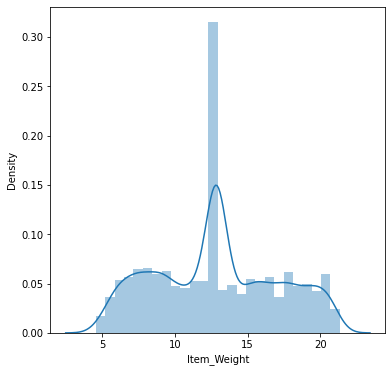

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

From the plot above, We can see that Item_Weight with range 13 is having the highest distribution.

Analysis of Item Visibility

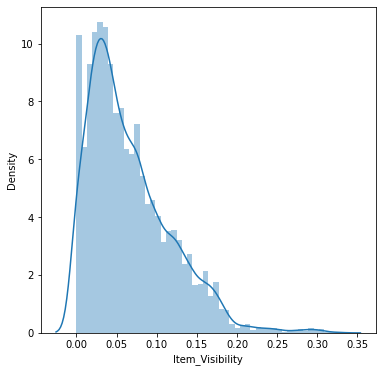

In [ ]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

The plot suggest that its not a normal distribution or we can say that the distribution is kind of right skewed or positive skewed

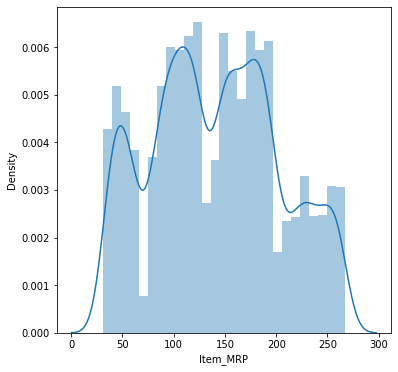

In [ ]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

Analysis of Outlet Sales

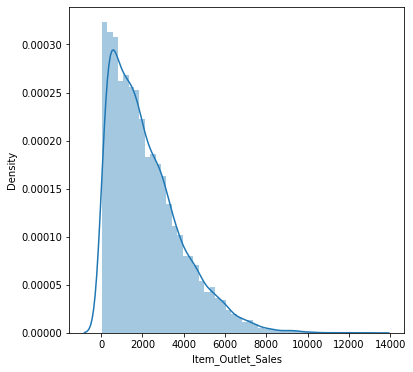

In [ ]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

Most Outlet sales in range of 1000 to 2000 and its a right skewed distribution

Analysis of Outlet Establishment Year

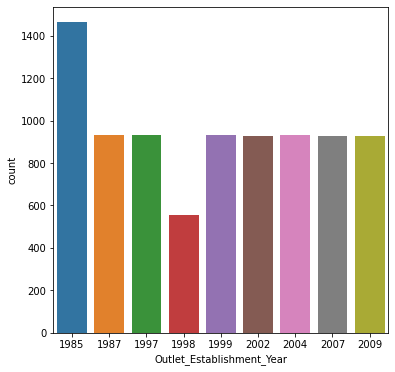

In [ ]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

Categorical Features

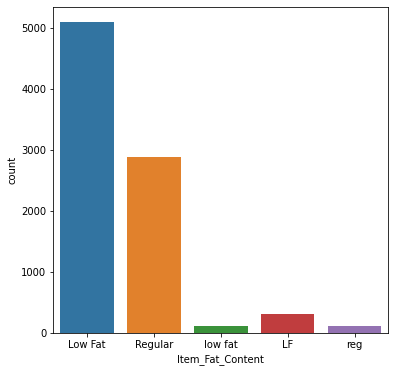

In [ ]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

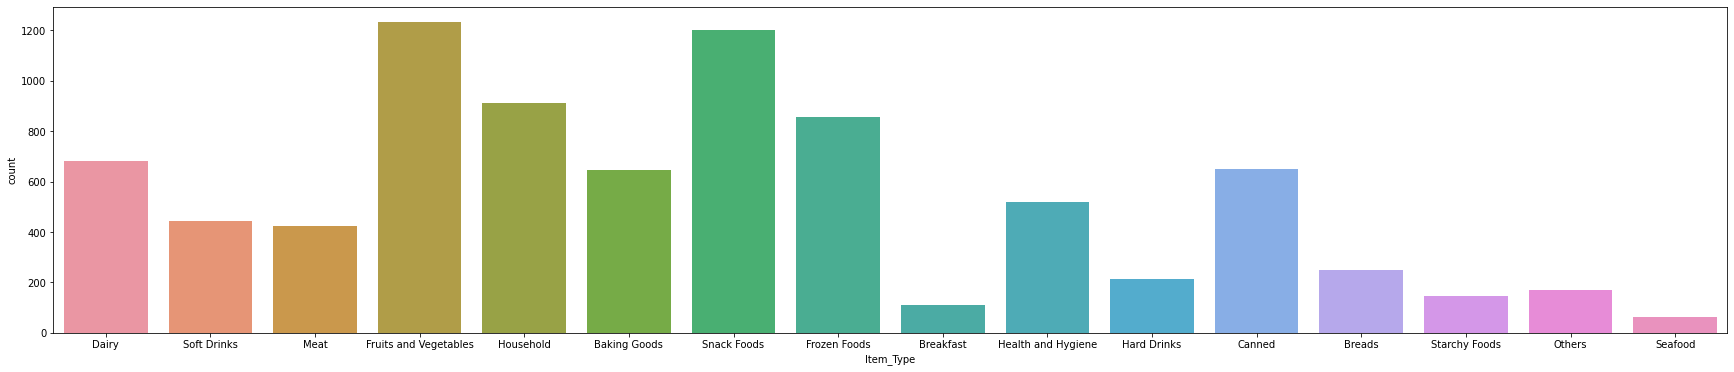

In [ ]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

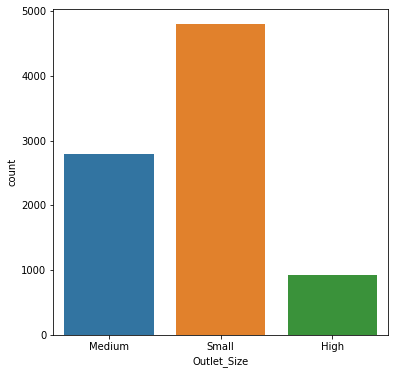

In [ ]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

Data Pre-Processing

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [ ]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Ordinal coding

In [ ]:
catcol = big_mart_data.select_dtypes(object).columns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
big_mart_data[catcol] =oe.fit_transform(big_mart_data[catcol])

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.92,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.50,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,1.0,0.000000,6.0,182.0950,0.0,1998,2.0,2.0,0.0,732.3800
4,1297.0,8.93,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052


In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.92,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.50,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,1.0,0.000000,6.0,182.0950,0.0,1998,2.0,2.0,0.0,732.3800
4,1297.0,8.93,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052


Splitting data into features and Target

In [ ]:
x = big_mart_data.iloc[:, :-1]
y = big_mart_data.iloc[:, -1]

In [ ]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0               156.0        9.300               0.0         0.016047   
1                 8.0        5.920               1.0         0.019278   
2               662.0       17.500               0.0         0.016760   
3              1121.0       19.200               1.0         0.000000   
4              1297.0        8.930               0.0         0.000000   
...               ...          ...               ...              ...   
8518            370.0        6.865               0.0         0.056783   
8519            897.0        8.380               1.0         0.046982   
8520           1357.0       10.600               0.0         0.035186   
8521            681.0        7.210               1.0         0.145221   
8522             50.0       14.800               0.0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0           4.0  249.8092                9.0    

In [ ]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

Create Model
as the data is contineous type so use Regression

In [ ]:

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(xtrain, ytrain)
ypred = linreg.predict(xtest)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(ytest, ypred))

0.5036092464135149


In [ ]:
train = linreg.score(xtrain, ytrain)
test = linreg.score(xtest, ytest)

print(f"Training Results -: {train}")
print(f"Testing Results -: {test}")


Training Results -: 0.503414468435812
Testing Results -: 0.5036092464135149


In [ ]:
linreg.coef_

array([ 3.06474974e-02,  9.90240040e-01,  5.63640390e+01, -1.73076833e+03,
        7.64865908e-01,  1.56945513e+01,  5.81898758e+01, -4.09334336e-01,
       -1.30494754e+02, -9.26975450e+01,  8.27195483e+02])

In [ ]:
from sklearn.linear_model import Ridge, Lasso
l2 = Ridge(alpha=10)
l2.fit(xtrain, ytrain)
ypred = l2.predict(xtest)

In [ ]:
train = l2.score(xtrain, ytrain)
test = l2.score(xtest, ytest)

print(f"Training Results -: {train}")
print(f"Testing Results -: {test}")

Training Results -: 0.5029996672760273
Testing Results -: 0.5036679769445449


In [ ]:
l2.coef_

array([ 3.25442858e-02,  1.05505826e+00,  5.35955151e+01, -1.03391333e+03,
        1.02730547e+00,  1.56968672e+01,  6.11826931e+01,  5.26874413e-02,
       -1.36595103e+02, -8.54796034e+01,  8.26481960e+02])

In [ ]:
l1 = Lasso(alpha=10)
l1.fit(xtrain, ytrain)
ypred = l1.predict(xtest)

In [ ]:
train = l1.score(xtrain, ytrain)
test = l1.score(xtest, ytest)

print(f"Training Results -: {train}")
print(f"Testing Results -: {test}")

Training Results -: 0.5002417286350025
Testing Results -: 0.5013024434672484


In [ ]:
pd.DataFrame(linreg.coef_, index=x.columns, columns=["Coefficients"])

,Coefficients
Item_Identifier,0.030647
Item_Weight,0.990240
Item_Fat_Content,56.364039
Item_Visibility,-1730.768332
Item_Type,0.764866
Item_MRP,15.694551
Outlet_Identifier,58.189876
Outlet_Establishment_Year,-0.409334
Outlet_Size,-130.494754
Outlet_Location_Type,-92.697545


Hypertuning

In [ ]:
for i in range(1, 200):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain, ytrain)
    train = l1.score(xtrain, ytrain)
    test = l1.score(xtest, ytest)
    print(f"{i}  {train}  {test}") 

1  0.5032704372450689  0.5037140594196743
2  0.5028395113493851  0.5035177065112044
3  0.5021216531787518  0.503018156180747
4  0.501118414203114  0.502202397641986
5  0.5006565593391024  0.5017856820915321
6  0.5005625370143668  0.501653881815689
7  0.5004494730402962  0.5014970040355516
8  0.50034269722673  0.5013622123886738
9  0.5002950093160896  0.5013351845520344
10  0.5002417286350025  0.5013024434672484
11  0.5001828399920246  0.5012639459604187
12  0.5001543578673966  0.5012536905310065
13  0.5001246515463159  0.5012414157482461
14  0.5000929068099353  0.5012237125765526
15  0.5000588512418672  0.5012036756711409
16  0.5000224409000553  0.5011812043857046
17  0.49998368059246445  0.5011563098285531
18  0.499942571542051  0.5011289946583932
19  0.49989911374913343  0.5010992588759213
20  0.4998533072127581  0.5010671024793819
21  0.4998051519339759  0.5010325254708345
22  0.49975487754228654  0.5009941849187115
23  0.4997027944000709  0.5009514935988973
24  0.49964839717515586 

In [ ]:
l1 = Lasso(alpha=1)
l1.fit(xtrain, ytrain)
ypred = l1.predict(xtest)

In [ ]:
train = l1.score(xtrain, ytrain)
test = l1.score(xtest, ytest)

print(f"Training Results -: {train}")
print(f"Testing Results -: {test}")

Training Results -: 0.5032704372450689
Testing Results -: 0.5037140594196743


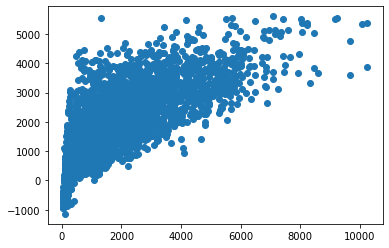

In [ ]:
plt.scatter(ytest, ypred)

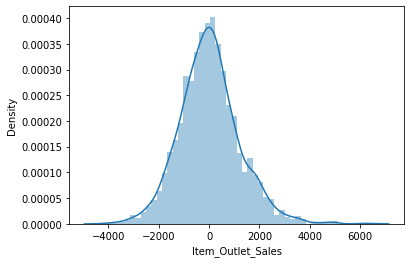

In [ ]:
sns.distplot((ytest-ypred))

Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ypred)

print(f"MAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\nAccuracy : {r2}")

MAE : 911.8722818951717
MSE : 1443645.63279078
RMSE : 1201.5180534601966
Accuracy : 0.5037140594196743


In [ ]:
train = linreg.score(xtrain, ytrain)
test = linreg.score(xtest, ytest)


print(f"Training Results -: {train}")
print(f"Testing Results -: {test}")

Training Results -: 0.503414468435812
Testing Results -: 0.5036092464135149


In [ ]:
x.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

Testing Of New Observation

In [ ]:
def predictprice(II,IW,IFC,IV,IT,IM,OI,OEY,OS,OLT,OT):
    newobs = [[II,IW,IFC,IV,IT,IM,OI,OEY,OS,OLT,OT]]
    yp = linreg.predict(newobs)[0]
    print(f"Item Outlet sale price is {yp:.2f}")
    return yp

In [ ]:
predictprice(1200,9,1,.0368,9,210,8,1987,2,2,0)

Item Outlet sale price is 2404.81


2404.811779084074